In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import display
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
import tensorflow as tf

In [52]:
import gym

env = gym.make("FrozenLake8x8-v0")
env.reset()

#plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)
print('observation space:', env.observation_space)
print('action space:', env.action_space)
print("taking action")
new_obs, reward, is_done, _ = env.step(1)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)


Observation space: Discrete(64)
Action space: Discrete(4)
observation space: Discrete(64)
action space: Discrete(4)
taking action
new observation code: 0
reward: 0.0
is game over?: False


In [53]:
n_states = env.observation_space.n
n_actions = env.action_space.n
print("Number of States: ", n_states)
print("Number of Actions: ", n_actions)

Number of States:  64
Number of Actions:  4


In [54]:
#Input policy to be evaluated

policy = np.ones((n_states , n_actions))/n_actions
print("Shape of Policy Matrix" , policy.shape)

#Initialize array V(s) = 0

V = np.zeros(n_states)
discount_factor = 1.0
theta = 0.00001

Shape of Policy Matrix (64, 4)


In [55]:
#Helper function which calculates the value for all actions
def one_step_lookahead(state , V , discount_factor = 1.0):
    v = np.zeros(n_actions)
    for a in range(n_actions):
        for prob, next_state, reward, done  in env.P[state][a]:
            v[a] = prob*(reward+discount_factor*V[next_state])
    return v
""""
Formula:
      V = sum(prob(s', r|s,a)) * (reward + gamma*V(s')) 

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-55-b40ab3be2f9c>, line 10)

### Policy Evaluation

In [56]:
def policy_evaluation(policy, env, discount_factor = 1.0 , theta = 0.00001 ):
    #Repeat:
    while True:
        delta = 0.0        #delta <- 0
    
        for s in range(n_states):   #For each state:
            v = 0
            for a , policy_prob in enumerate(policy[s]):                            #Expression---
                for prob, next_state, reward, done  in env.P[s][a]:
                    v += policy_prob * prob *(reward + discount_factor*V[next_state])     # V(s) = sum(policy(a|s) * sum(prob(s', r|s,a)) * (reward + gamma*V(s')) 
            delta = max(delta , abs(v - V[s]))            #delta <- max(delta , |v - V[s]|)
            V[s] = v

        if(delta<theta):                    #terminate on delta < theta (theta is a small positive number)
            break
    return V
        # Output V ~= vpi

Value:  [1.78136204e-03 2.05999068e-03 2.71888143e-03 4.03324969e-03
 6.45744872e-03 9.70492057e-03 1.33407086e-02 1.58576283e-02
 1.53440943e-03 1.70055984e-03 2.08191792e-03 2.94095125e-03
 5.65363665e-03 9.33847674e-03 1.44835925e-02 1.83995611e-02
 1.14008330e-03 1.13560704e-03 9.74455750e-04 0.00000000e+00
 3.88591626e-03 7.52183124e-03 1.68675130e-02 2.48700563e-02
 7.63739125e-04 7.33175638e-04 6.82171031e-04 7.63416674e-04
 2.37236840e-03 0.00000000e+00 2.06022087e-02 3.93516579e-02
 4.26627367e-04 3.54535526e-04 2.59176639e-04 0.00000000e+00
 4.84052436e-03 1.15883172e-02 2.61941282e-02 7.25877759e-02
 1.66026970e-04 0.00000000e+00 0.00000000e+00 1.44777335e-03
 5.40202509e-03 1.53199688e-02 0.00000000e+00 1.52220033e-01
 7.26921917e-05 0.00000000e+00 1.09167861e-04 3.89235304e-04
 0.00000000e+00 4.42895802e-02 0.00000000e+00 3.84073264e-01
 5.27020839e-05 3.33492788e-05 4.74920640e-05 0.00000000e+00
 5.39461146e-02 1.61838374e-01 3.87279455e-01 0.00000000e+00]


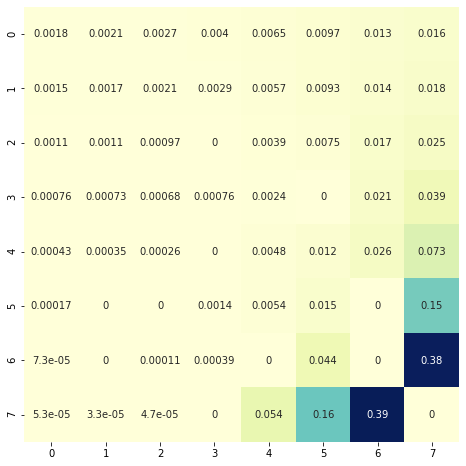

In [58]:
vpi = policy_evaluation(policy , env) 
print("Value: " , vpi)
plt.figure(figsize=(8, 8))
sns.heatmap(vpi.reshape(8, 8),  cmap="YlGnBu", annot=True, cbar=False, square=True);

### Policy Iteration

In [40]:
def policy_iteration(env , discount_factor=1.0):
    #1. Initialization
    policy = np.ones((n_states , n_actions))/n_actions

    while True:
        #2. Policy Evaluation
        V = policy_evaluation(policy , env) 
    
        #3. Policy Improvement
        policy_stable = True
        
        for s in range(n_states):  #for each s in States
            old_action = np.argmax(policy[s])            #old_action <- policy[s]
            best_action = np.argmax(one_step_lookahead(s , V))  #policy[s]<- sum(prob(s', r|s,a)) * (reward + gamma*V(s')) 
            if old_action != best_action:           #if old-action != policy(s), then policy-stable -> false
                policy_stable = False 
            policy[s] = np.eye(n_actions)[best_action]   #(Making the index of policy for the best action as 1)
        if policy_stable:         #if policy-stable, then stop and return V  and policy   
            return policy, V

Policy:  [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
Value:  [2.85609659e-03 3.1464

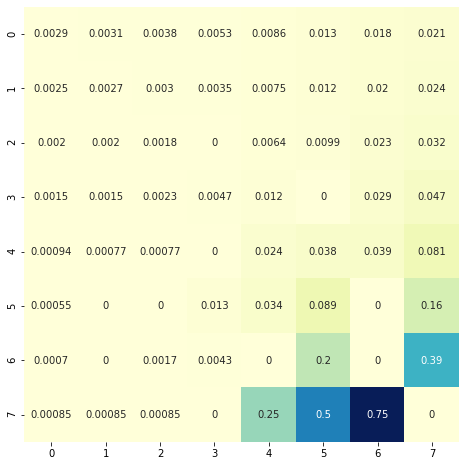

In [60]:
policy , V = policy_iteration(env)
print("Policy: ", policy)
print("Value: " , V)
plt.figure(figsize=(8, 8))
sns.heatmap(V.reshape(8, 8),  cmap="YlGnBu", annot=True, cbar=False, square=True);

### Value Iteration

In [34]:
def value_iteration(env , discount_factor = 1.0 , theta = 0.00001 ):
    V = np.zeros(n_states)     #Initialize array V arbitrarily
    
    #Repeat
    while True:    
        delta = 0.0        #delta <- 0
        for s in range(n_states):   #For each s in state:
            v = V[s]               # v <- V(s)
            V[s] = max(one_step_lookahead(s, V , discount_factor = discount_factor))  # V(s) = max(sum(prob(s', r|s,a)) * (reward + gamma*V(s'))) 
            delta = max(delta , abs(v - V[s]))            #delta <- max(delta , |v - V[s]|)
            
        if(delta<theta):                    #terminate on delta < theta (theta is a small positive number)
            break

    #Output a deterministic policy pi such that:
    policy = np.zeros((n_states, n_actions))

    for s in range(n_states):
        best_action = np.argmax(one_step_lookahead(s , V))
        policy[s] = np.eye(n_actions)[best_action]
    
    return policy, V

Policy:  [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
Value:  [0.00000000e+00 0.0000

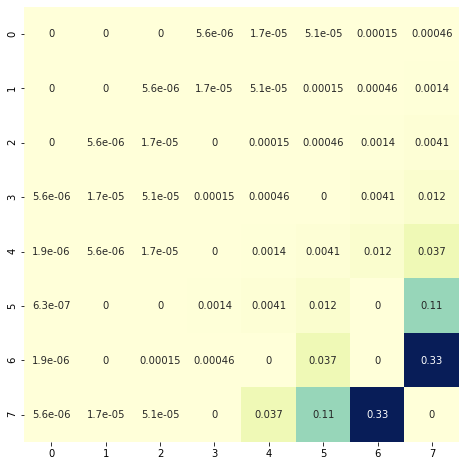

In [61]:
policy , V = value_iteration(env)
print("Policy: ", policy)
print("Value: " , V)
plt.figure(figsize=(8, 8))
sns.heatmap(V.reshape(8, 8),  cmap="YlGnBu", annot=True, cbar=False, square=True);